In [4]:
from PIL import Image
from skimage import measure
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import paired_distances



Image_folder = 'Y:\coskun-lab\Thomas\Mayar-Data\Image'
Mask_folder = 'Y:\coskun-lab\Thomas\Mayar-Data\Mask'
Cluster_folder = 'Y:\coskun-lab\Thomas\Mayar-Data\Clusters'

%matplotlib inline

In [5]:
RGB_MAP = {
    4: {
        'rgb': np.array([255,0,0]),
        'range': [0, 255]
    },
    1: {
        'rgb': np.array([0,255,0]),
        'range': [0, 150]
    },
    3: {
        'rgb': np.array([0,0,255]),
        'range': [0, 255]
    },
    6: {
        'rgb': np.array([102,205,170]),
        'range': [0, 255]
    },
    2: {
        'rgb': np.array([253, 164, 0]),
        'range': [0, 255]
    },
    5: {
        'rgb': np.array([75,0,130]),
        'range': [0, 100]
    }
    ,7: {
        'rgb': np.array([255, 21, 240]),
        'range': [0, 255]
    }
    ,8: {
        'rgb': np.array([255, 255, 100]),
        'range': [0, 255]
    }
}

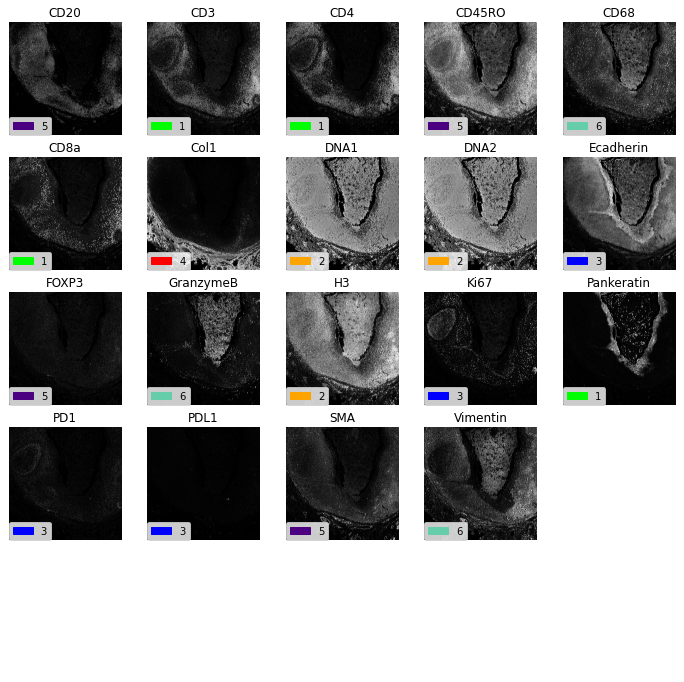

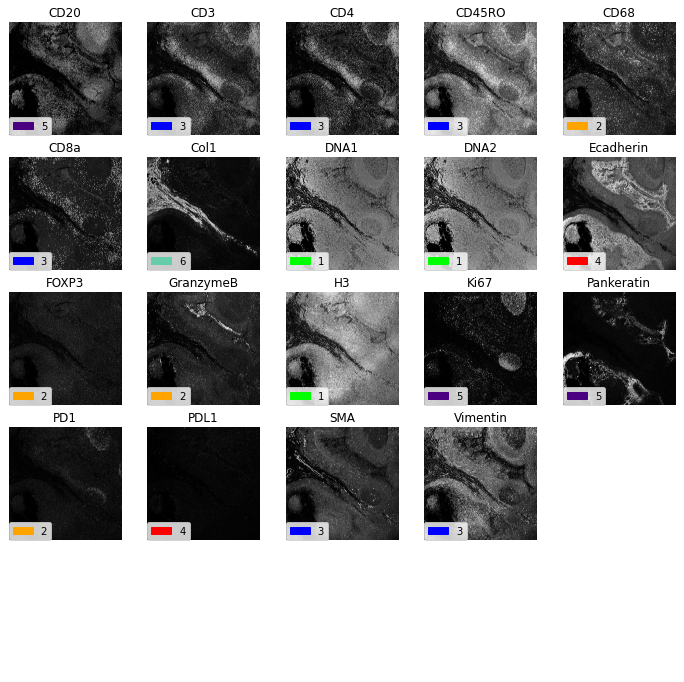

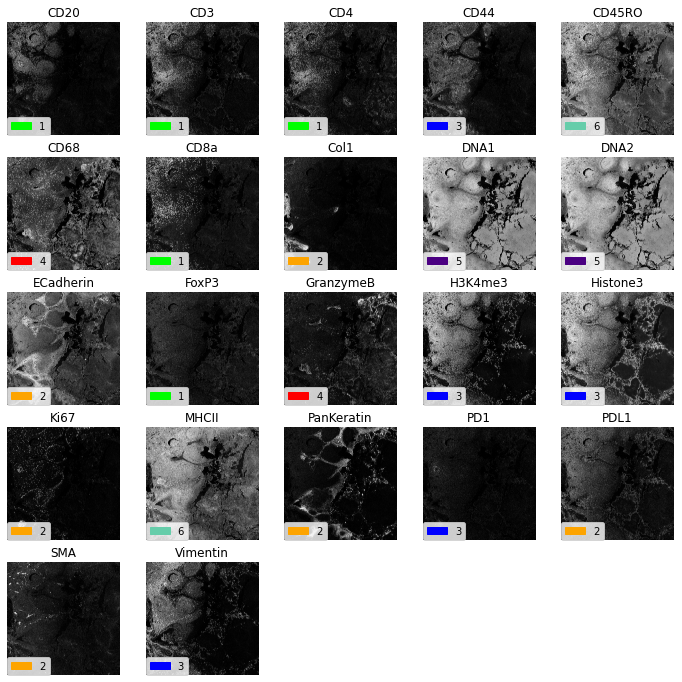

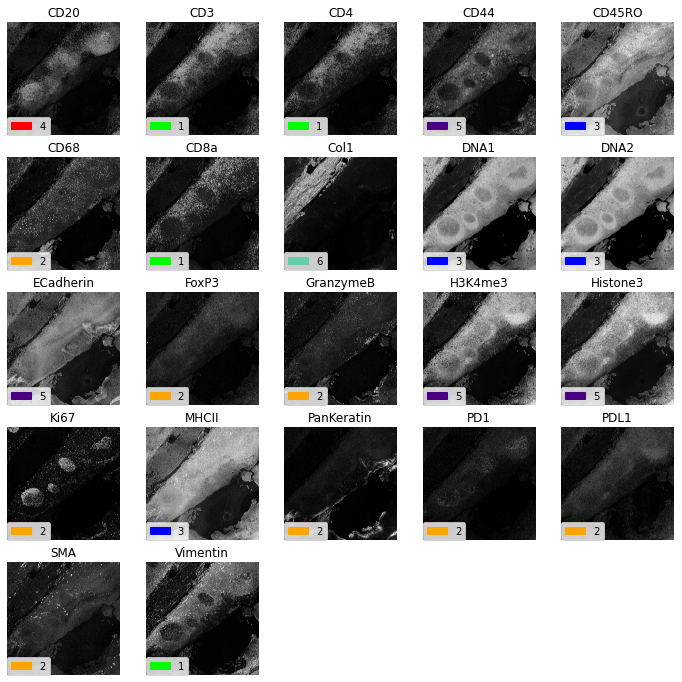

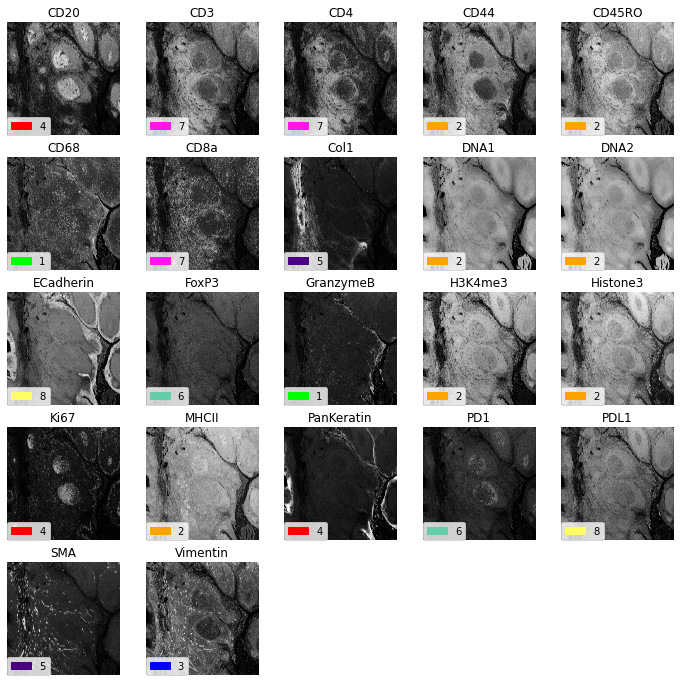

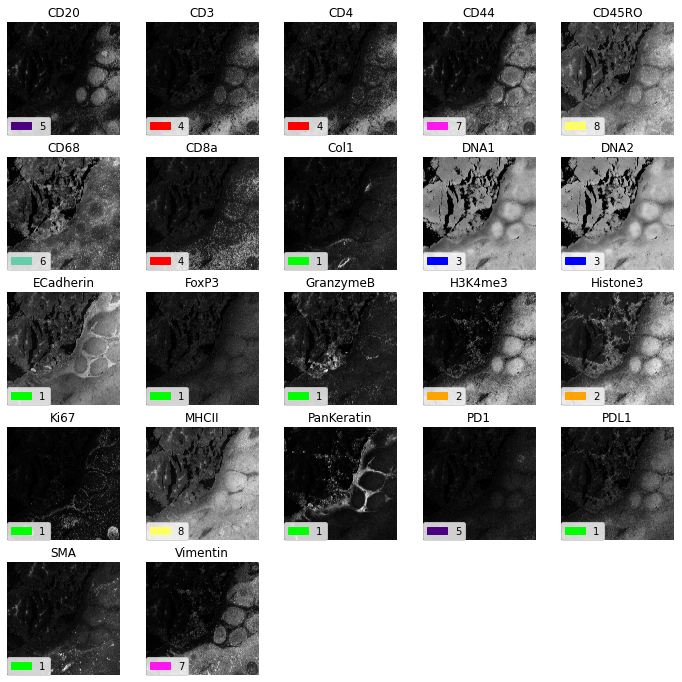

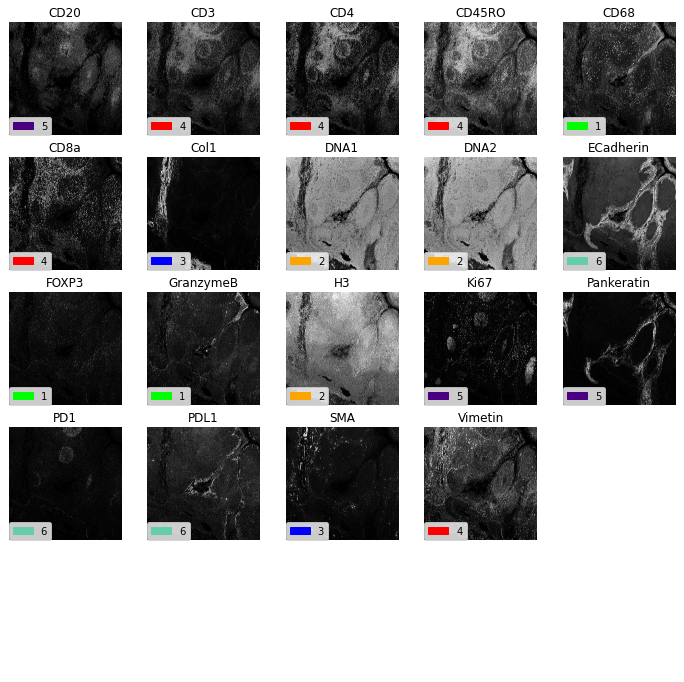

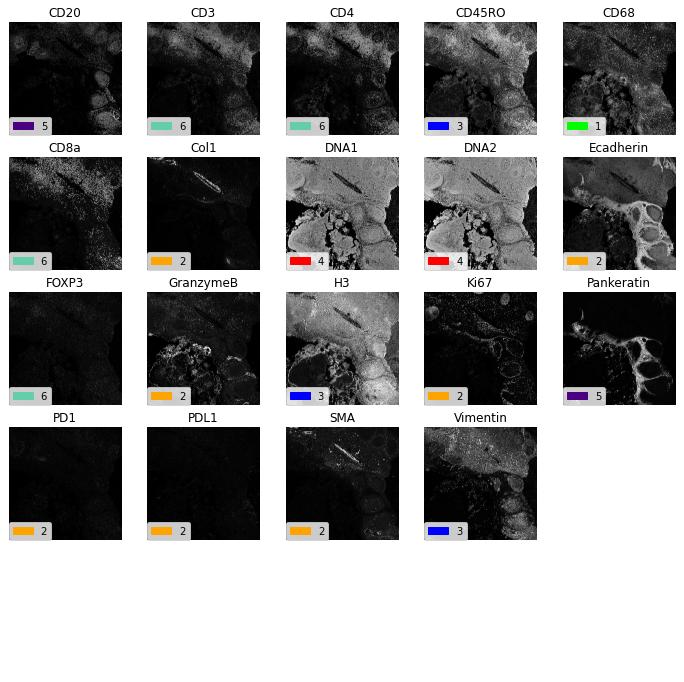

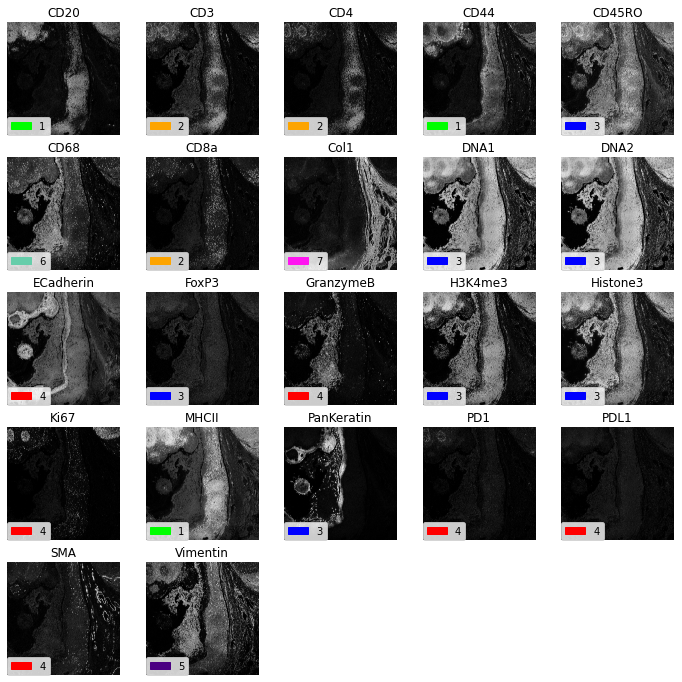

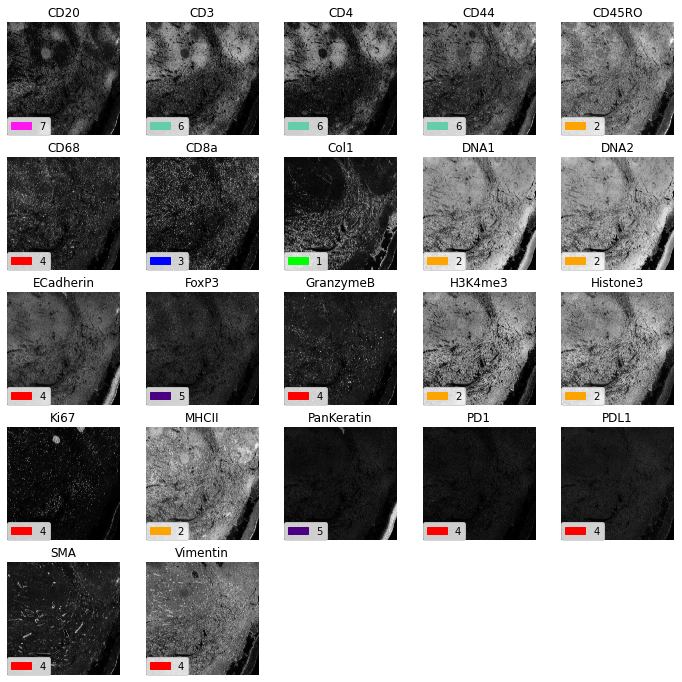

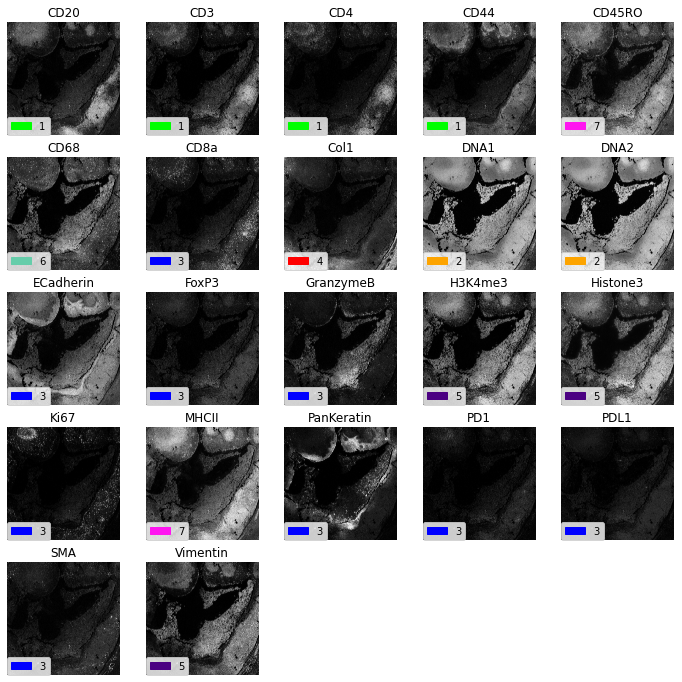

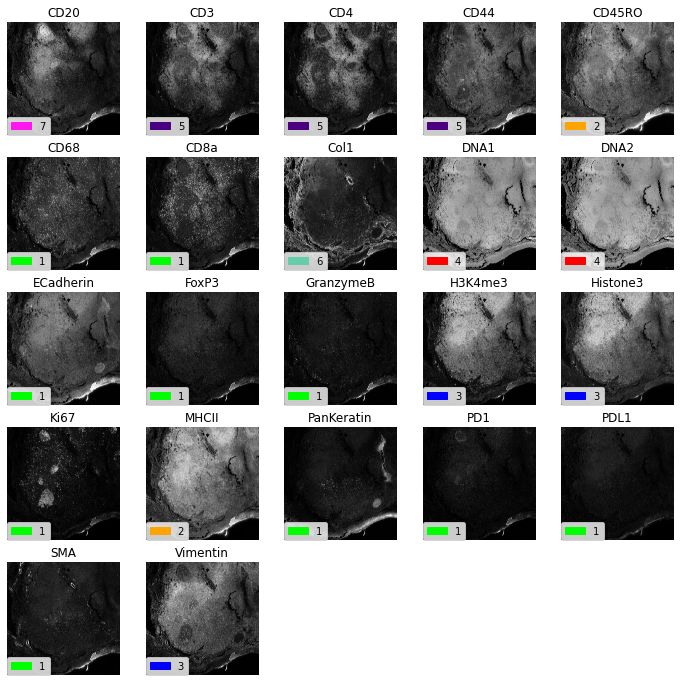

In [6]:
experiments = ['DT14', 'DT15', 'NT1 ROI004', 'NT1 ROI005', 'NT2 ROI003','NT2 ROI004', 'NT2L', 'NT2R', 'ROI005 Area 1', 'ROI006 Area 2', 'ROI007 Area 1', 'ROI008 Area 2']

# Experiment
for experiment in experiments:

    imgs = []
    markers = []

    for (dirpath, dirnames, filenames) in os.walk(Image_folder):
        for name in filenames:
            if 'tiff' in name and experiment in name:
                img = cv2.imread(os.path.join(dirpath,name),0)
                imgs.append(img)
                markers.append(name.split('_')[1].split('.')[0])

    for (dirpath, dirnames, filenames) in os.walk(Cluster_folder):
        for name in filenames:
            if 'csv' in name and experiment in name:
                df = pd.read_csv(os.path.join(dirpath, name))
                df_cluster = df.groupby('Cluster').agg({'Marker': lambda x: '\\'.join(x)})
                label_map = df_cluster.to_dict()['Marker']

    fig, axs = plt.subplots(5, 5, figsize=(12, 12))
    axs = axs.flatten()
    for i, ax in enumerate(axs):
        try:
            ax.imshow(imgs[i], cmap = 'gray')
            ax.axis('off')
            ax.set_title(markers[i])
            cluster = df.iloc[i].Cluster + 1
            patches = [mpatches.Patch(color=RGB_MAP[cluster]['rgb']/255.0,label=cluster)]
            ax.legend(handles=patches,  loc=3, borderaxespad=0., fontsize=10)
        except:
            ax.axis('off')
    plt.show()

    fig.savefig(experiment + '_marker2cluter.png', bbox_inches='tight')